Assignment: Drone Delivery System
---------------------------------
Mathematics and Methods in Machine Learning and Neural Networks  
Helsinki Metropolia University of Applied Sciences  
23.1.2020  

Using clustering algorithms to decide drone depot locations for a drone delivery system. Input data are customer coordinates.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors.nearest_centroid import NearestCentroid

n_clusters = 7    # !!! Modify this value to select number of clusters. !!!

In [2]:
url = r'http://users.metropolia.fi/~simomake/coursework/ml/drone_delivery_v1.csv'
coords = pd.read_csv(url, 
                     sep = ';', 
                     index_col = 'clientid',
                     na_values = '?')

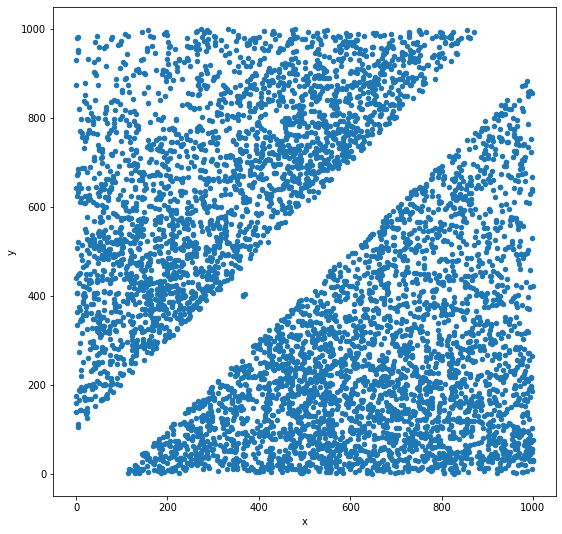

In [3]:
# Visualize location data:
coords.plot.scatter(x='x', y='y', figsize=(9, 9))
plt.show()

There is perhaps a river and a small island recognizable.

In [4]:
%%time
kmeans = KMeans(n_clusters=n_clusters).fit(coords)

Wall time: 1.66 s


__K-means execution times:__  
t(3 clusters)   = 0.66 s  
t(10 clusters)  = 1.95 s  
t(50 clusters)  = 7.33 s  
t(100 clusters) = 10.8 s  
t(1000 clusters) = 76 s  
t(5000 clusters) = 300 s

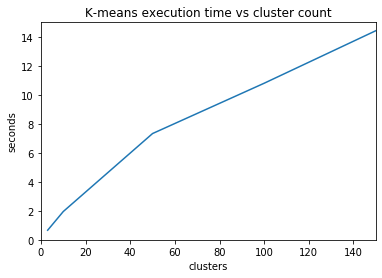

In [5]:
plt.title("K-means execution time vs cluster count")
plt.xlim((0, 150)), plt.xlabel("clusters")
plt.ylim((0, 15)), plt.ylabel("seconds")
plt.plot([3, 10, 50, 100, 1000, 5000], [0.66, 1.95, 7.33, 10.8, 76, 300])
plt.show()

Execution time seems to grow at a linear rate when number of clusters is increased.

In [6]:
centroids = kmeans.cluster_centers_
print(centroids)

[[279.21292368  96.40831267]
 [249.26510444 765.22930631]
 [824.10609216 544.95187801]
 [842.77319282 144.25171262]
 [168.6681494  449.77659468]
 [555.74957712 199.43560759]
 [573.87436024 835.76572378]]


Let's try the same with hierarchical clustering:

In [7]:
%%time
agglomerative = AgglomerativeClustering(n_clusters=n_clusters).fit(coords)

Wall time: 7.99 s


__Agglomerative hierarchical execution times:__  
t(3 clusters)   = 5.74 s  
t(10 clusters)  = 5.69 s  
t(50 clusters)  = 5.76 s  
t(100 clusters) = 5.78 s  
Execution time seems independent of cluster count.  

Hierarchical clustering vs. K-means seems to be
- faster for a large number of clusters
- slower for a small number of clusters.

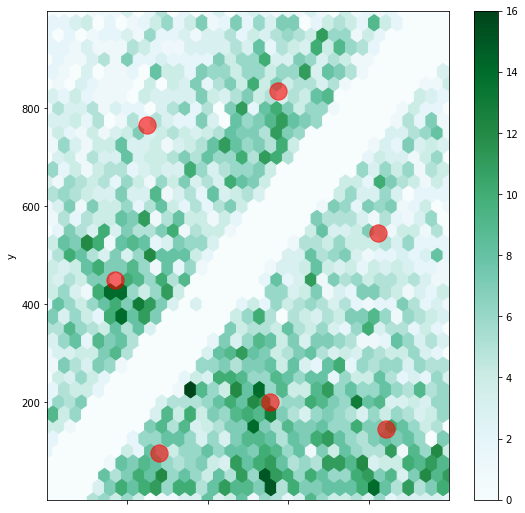

In [8]:
coords.plot.hexbin(x='x', y='y', gridsize=35, figsize=(9, 9))
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', alpha=0.6)
plt.show()

Hexbin plot helps visualize population density.

In [9]:
# add columns containing depot labels
depot_kmeans = kmeans.predict(coords)
depot_aggl = agglomerative.labels_
coords['depot_kmeans'] = pd.Series(depot_kmeans, index=coords.index)
coords['depot_agglomerative'] = pd.Series(depot_aggl, index=coords.index)

In [10]:
coords.head(10)

,x,y,depot_kmeans,depot_agglomerative
clientid,,,,
1,622.771572,164.857623,5,3
2,416.357298,630.193634,1,0
3,292.735020,567.333231,4,0
4,737.211288,166.225676,3,3
5,540.475375,682.912298,6,4
6,535.469492,318.439661,5,6
7,640.380050,870.833221,6,4
8,235.772075,359.048203,4,5
9,481.896884,661.491838,6,0


In [11]:
# calculate centroids for clusters made by agglomerative hierarchical algorithm:
pos_array = coords.filter(items=['x', 'y'])
clf = NearestCentroid()
clf.fit(pos_array, depot_aggl)
aggl_cen = clf.centroids_
print(aggl_cen)

[[254.42132693 665.88354114]
 [381.06039095  86.92609391]
 [813.649201   532.45478109]
 [820.72358139 130.54472978]
 [591.92916518 863.83882505]
 [121.83190554 346.09700529]
 [566.64612911 255.5607227 ]]


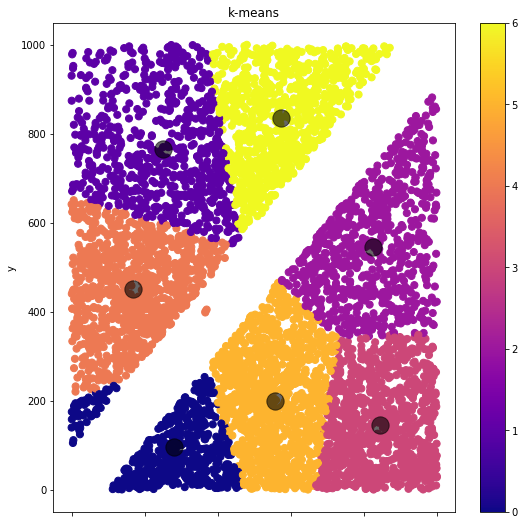

In [12]:
coords.plot.scatter(x='x', y='y', c=depot_kmeans, s=50, cmap='plasma', figsize=(9, 9), title="k-means")
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', alpha=0.6)
plt.show()

K-means cluster borders are defined by distance from nearest centroid so they appear straight.

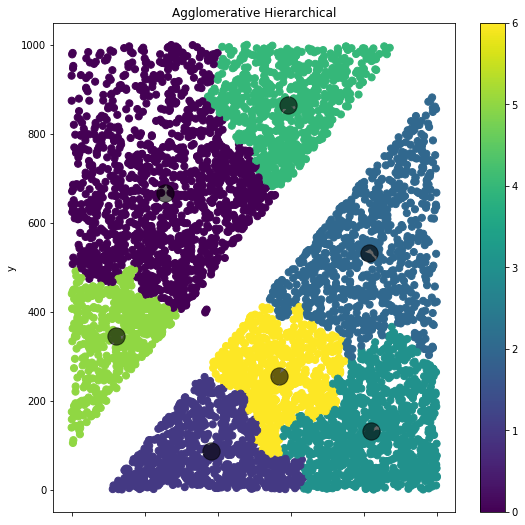

In [13]:
coords.plot.scatter(x='x', y='y', c=depot_aggl, s=50, cmap='viridis', figsize=(9, 9), title="Agglomerative Hierarchical")
plt.scatter(aggl_cen[:, 0], aggl_cen[:, 1], s=300, c='black', alpha=0.6)
plt.show()

- Clusters defined by the hierarchical algorithm appear more organic in shape.  
- Some customers have a shorter distance to a neighboring cluster's depot.
- Thus, k-means clustering seems more suitable for this job.